### Atlas Scientific pH  
pH Sensor for measuring acidity (hydrogen ion concentration) of liquids  

Manufacturer Link: https://www.atlas-scientific.com/ph.html  

In [1]:
import matplotlib.pyplot as plt

from meerkat.base import time
from meerkat import atlas, parser

In [2]:
# instance device and set output format to .csv (which is default)
dev = atlas.pH(bus_n=1, output='csv')

#### Configuration

In [3]:
# device information: device type, firmware version
time.sleep(0.5)
dev.info()

('pH', '1.7')

In [4]:
# status of device power: restart code, input voltage Vcc
time.sleep(0.5)
dev.status()

('P', 3.21)

In [5]:
# set current temperature for compensation
time.sleep(0.5)
dev.temp_set(24.4)
time.sleep(0.5)
dev.temp_get()

24.39

#### Calibration

In [6]:
# Three point calibration
dev.cal_set_mid(7.00)
time.sleep(1)
dev.cal_set_low(3.00)
time.sleep(1)
dev.cal_set_high(10.09)
time.sleep(1)
dev.cal_get()

3

In [7]:
# clear calibration
time.sleep(1)
dev.cal_clear()
time.sleep(1)
dev.cal_get()

0

In [8]:
# response breakdown of calibration
time.sleep(0.5)
dev.cal_slope()

(99.9, 99.9)

In [9]:
# single pH measurement
time.sleep(0.5)
dev.measure()

3.811

#### CSV Writer Output

In [10]:
# write 5 samples to .csv file with description
dev.write(description='test_1', n=5)

In [11]:
# name of file written
dev.writer.path

'2019_06_04_13_37_04_data.csv'

In [12]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.writer.path)

In [13]:
df

,std_time_ms,description,sample_n,pH,datetime64_ns
0,2019-06-04 13:37:04.592467,test_1,0,3.809,2019-06-04 13:37:04.592467
1,2019-06-04 13:37:07.048463,test_1,1,3.811,2019-06-04 13:37:07.048463
2,2019-06-04 13:37:09.504308,test_1,2,3.810,2019-06-04 13:37:09.504308
3,2019-06-04 13:37:11.959677,test_1,3,3.810,2019-06-04 13:37:11.959677
4,2019-06-04 13:37:14.414421,test_1,4,3.808,2019-06-04 13:37:14.414421


In [14]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack

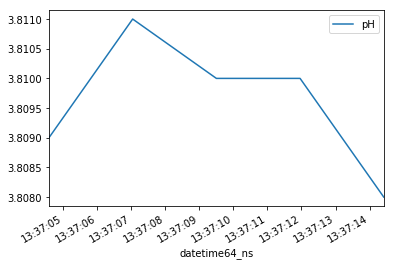

In [15]:
df[["datetime64_ns", "pH"]].plot(x="datetime64_ns");

In [16]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': None,
  'active': None,
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0x6e8fdd70>',
  'calibration_date': None,
  'description': '',
  'dtype': None,
  'error': None,
  'manufacturer': 'Atlas Scientific',
  'name': 'Atlas_Base',
  'precision': 'Varies',
  'state': None,
  'urls': 'www.atlas-scientific.com',
  'version_hw': '1.0',
  'version_sw': '1.0'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['description', 'sample_n', 'pH'],
 'licenses': None,
 'line_terminator': '\n',
 'media_type': 'text/csv',
 'name': 'Atlas_pH',
 'null_sequence': 'NA',
 'path': '2019_06_04_13_37_04_data.csv',
 'precision': None,
 'quote_char': '"',
 'schema': None,
 'shebang': True,
 'skip_initial_space': True,
 'skip_lines': 1,
 'sources': None,
 'standard': 'Follow RFC 4180',
 'st

In [17]:
# get one sample without a description
dev.get()

['no_description', 0, 3.808]

In [19]:
# get 5 samples with a description
dev.get('test_2', n=5)

[['test_2', 0, 3.806],
 ['test_2', 1, 3.805],
 ['test_2', 2, 3.807],
 ['test_2', 3, 3.81],
 ['test_2', 4, 3.805]]

#### JSON Writer Output

In [20]:
# switch to JSON output, csv is default
dev = atlas.pH(bus_n=1, output='json')

In [21]:
# set the metadata publishing interval to every third sample
dev.writer.metadata_interval = 3

In [22]:
# get 7 samples with a description
dev.write(description='test_3', n=7)

In [23]:
# name of file written
dev.writer.path

'2019_06_04_13_41_58_JSON_data.txt'

In [24]:
!head $dev.writer.path

{"description": "test_3", "sample_n": 0, "std_time_ms": "2019-06-04 13:41:58.643936", "pH": 3.804}
{"description": "test_3", "sample_n": 1, "std_time_ms": "2019-06-04 13:42:01.099754", "pH": 3.805}
{"strfmtime": "%Y-%m-%d %H:%M:%S.%f", "metadata_interval": 3, "skip_lines": 0, "sample_n": 2, "media_type": "text/json", "schema": null, "null_sequence": "NA", "encoding": "utf-8", "standard": "RFC 8259", "time_format": "std_time_ms", "quote_char": "\"", "title": null, "name": "Atlas_pH", "pH": 3.808, "line_terminator": "\n", "accuracy": null, "description": null, "units": null, "escape_char": "\\", "dtypes": null, "version": "0.1 Alpha", "path": "2019_06_04_13_41_58_JSON_data.txt", "double_quote": true, "licenses": null, "metadata_file_i": 0, "metadata_stream_i": 1, "format": null, "bytes": null, "device": {"state": null, "accuracy": null, "bus": "<meerkat.i2c_pi.WrapI2C object at 0x6e90a990>", "manufacturer": "Atlas Scientific", "version_hw": "1.0", "calibration_date": null, "active": null

In [25]:
# get 3 samples with a description
dev.get('test_4', 3)

['{"description": "test_4", "sample_n": 0, "std_time_ms": "2019-06-04 13:42:16.150308", "pH": 3.806}',
 '{"description": "test_4", "sample_n": 1, "std_time_ms": "2019-06-04 13:42:17.103131", "pH": 3.806}',
 '{"strfmtime": "%Y-%m-%d %H:%M:%S.%f", "metadata_interval": 3, "skip_lines": 0, "sample_n": 2, "media_type": "text/json", "schema": null, "null_sequence": "NA", "encoding": "utf-8", "standard": "RFC 8259", "time_format": "std_time_ms", "quote_char": "\\"", "title": null, "name": "Atlas_pH", "pH": 3.808, "line_terminator": "\\n", "accuracy": null, "description": null, "units": null, "escape_char": "\\\\", "dtypes": null, "version": "0.1 Alpha", "path": "2019_06_04_13_41_58_JSON_data.txt", "double_quote": true, "licenses": null, "metadata_file_i": 2, "metadata_stream_i": 0, "format": null, "bytes": null, "device": {"state": null, "accuracy": null, "bus": "<meerkat.i2c_pi.WrapI2C object at 0x6e90a990>", "manufacturer": "Atlas Scientific", "version_hw": "1.0", "calibration_date": null, 